In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


def read_data_from_csv(file_name):
    df = pd.read_csv(file_name)
    print(df.shape)
    print("------------ df info ------------")
    print(df.describe())
    print(df.head())
    return df

def _prepare_np_for_model(df):
    data_df = df[["ns", "m", "d", "e"]]
    data_df = data_df.values
    print('extract numpy from data', data_df)
    scaler = MinMaxScaler(feature_range=(0,1))
    data_scaled = scaler.fit_transform(data_df)
    print('-------- after scaling --------', data_scaled)
    return data_scaled



def hierarchy_cluster(x):
    Z = linkage(x, method='single')  # Using Ward's linkage method

    # Plot the dendrogram
    # plt.figure(figsize=(8, 6))
    # plt.title('Hierarchical Clustering Dendrogram')
    # plt.xlabel('Data Points')
    # plt.ylabel('Distance')
    # plt.show()
    dendrogram(Z)
    np.save('2021_linkage_matrix_single.npy', Z)
    print(Z)
    return


def _get_clusterMatrix(name):
    filename = f"2021_linkage_matrix_{name}.npy"
    matrix = np.load(filename)
    return matrix


def _plot_clusterMatrix(name):
    z_matrix = _get_clusterMatrix(name)
    plt.figure(figsize=(16, 12))
    dendrogram(z_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    # plt.savefig(f'fig_2021_hierarchy_cluster_{name}.png')
    plt.show()
    return


# Print the cluster labels
def get_cluster_label(name):
    Z_matrix = _get_clusterMatrix(name)
    k = 6  # Specify the desired number of clusters
    labels = fcluster(Z_matrix, k, criterion='maxclust')
    unique_values, value_counts = np.unique(labels, return_counts=True)

    # Print the unique values and their counts
    for value, count in zip(unique_values, value_counts):
        print(f"{value}: {count}")

    return labels

In [2]:
data_2021_file = "data_2021.csv"
df_2021 = read_data_from_csv(data_2021_file)
x = _prepare_np_for_model(df_2021)

(8148, 5)
------------ df info ------------
                ns            m            d            e           id
count  8148.000000  8148.000000  8148.000000  8148.000000   8148.00000
mean      5.707209    -0.307967    -0.772208     0.444096  75397.50000
std       2.246172     0.769485     2.059090     1.470737   2352.26933
min       2.686000    -1.627000    -3.805000    -1.728000  71324.00000
25%       3.898000    -0.853000    -2.693000    -0.974000  73360.75000
50%       5.524000    -0.524000    -0.771500     0.217000  75397.50000
75%       7.779000     0.268750     1.224000     1.810000  77434.25000
max       9.383000     1.344000     2.901000     3.020000  79471.00000
      ns      m      d      e     id
0  2.789 -1.627 -3.546  3.015  71324
1  2.863 -1.203 -3.607  2.594  71325
2  2.798 -0.795 -3.684  1.307  71326
3  4.180  0.019 -3.154 -0.446  71327
4  2.686 -0.524 -3.757 -0.974  71328
extract numpy from data [[ 2.789 -1.627 -3.546  3.015]
 [ 2.863 -1.203 -3.607  2.594]
 [ 2.798 

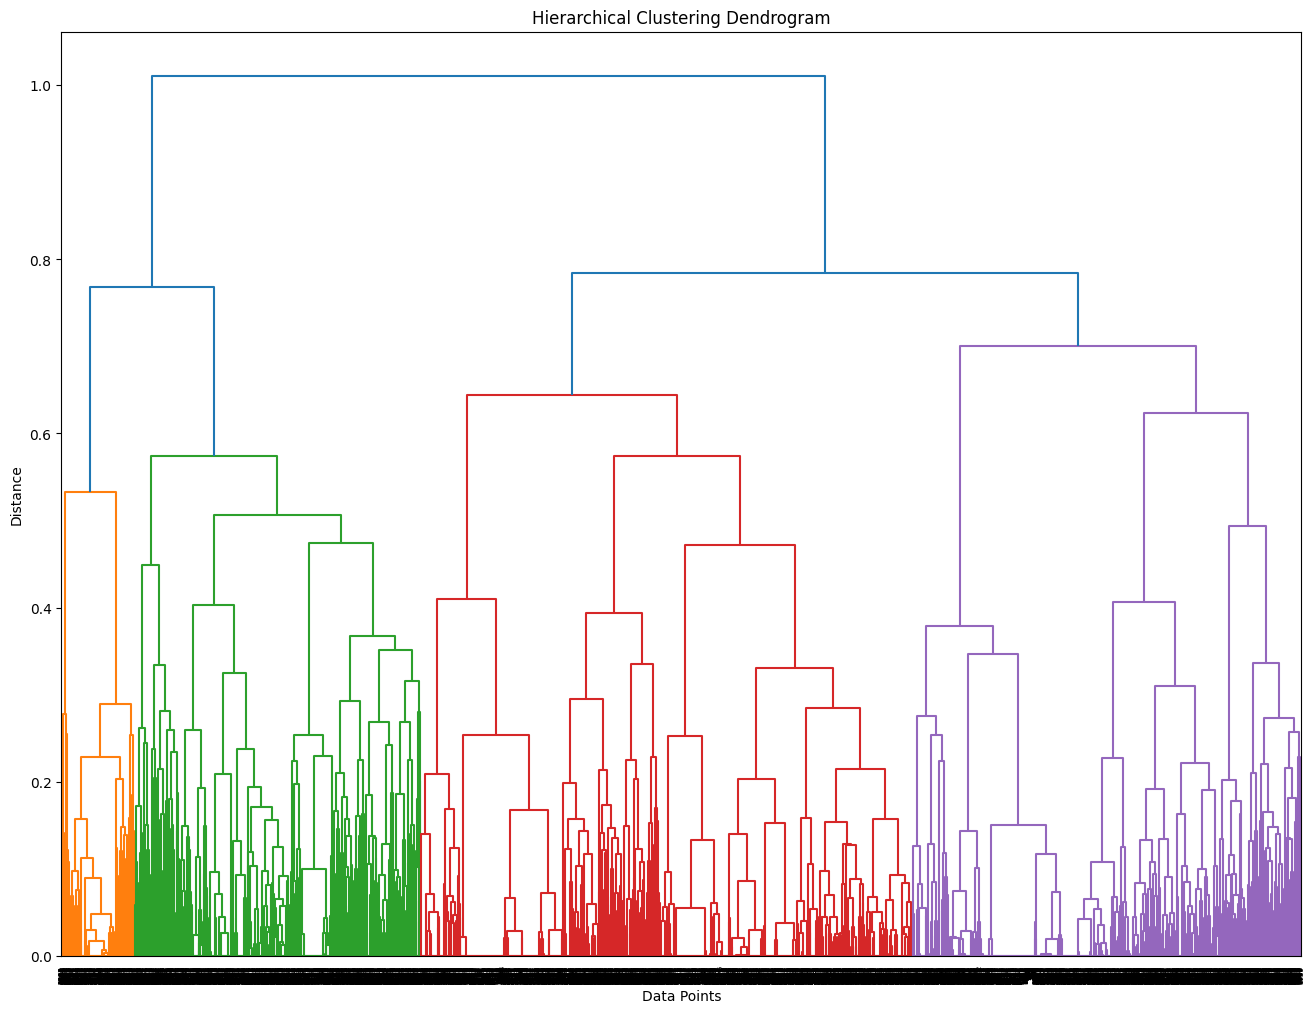

In [3]:
cluster_algo = "average"
_plot_clusterMatrix(cluster_algo)

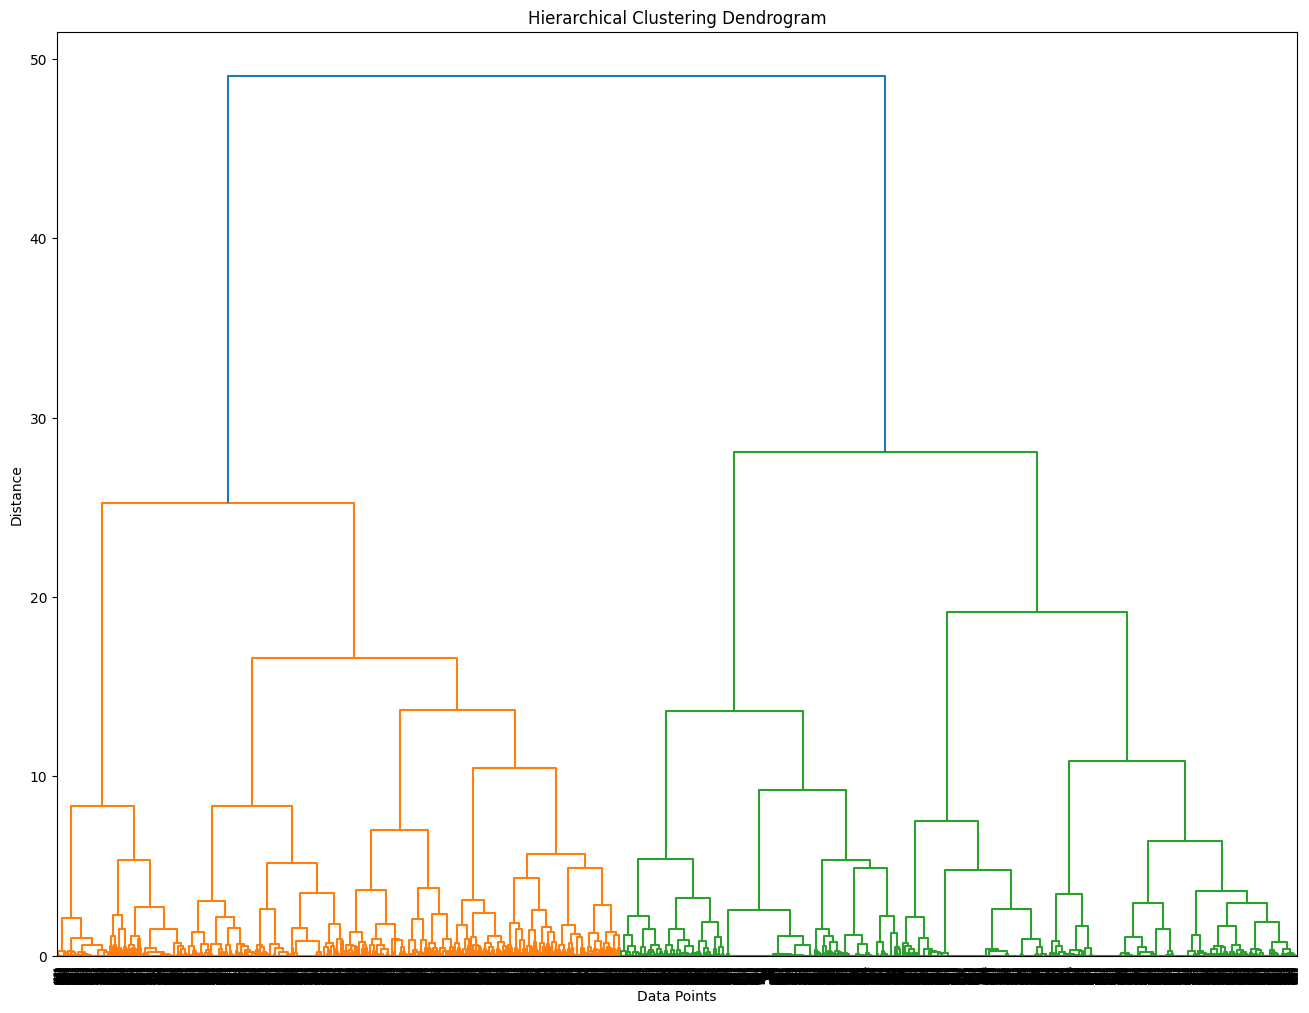

In [4]:
cluster_algo = "ward"
_plot_clusterMatrix(cluster_algo)

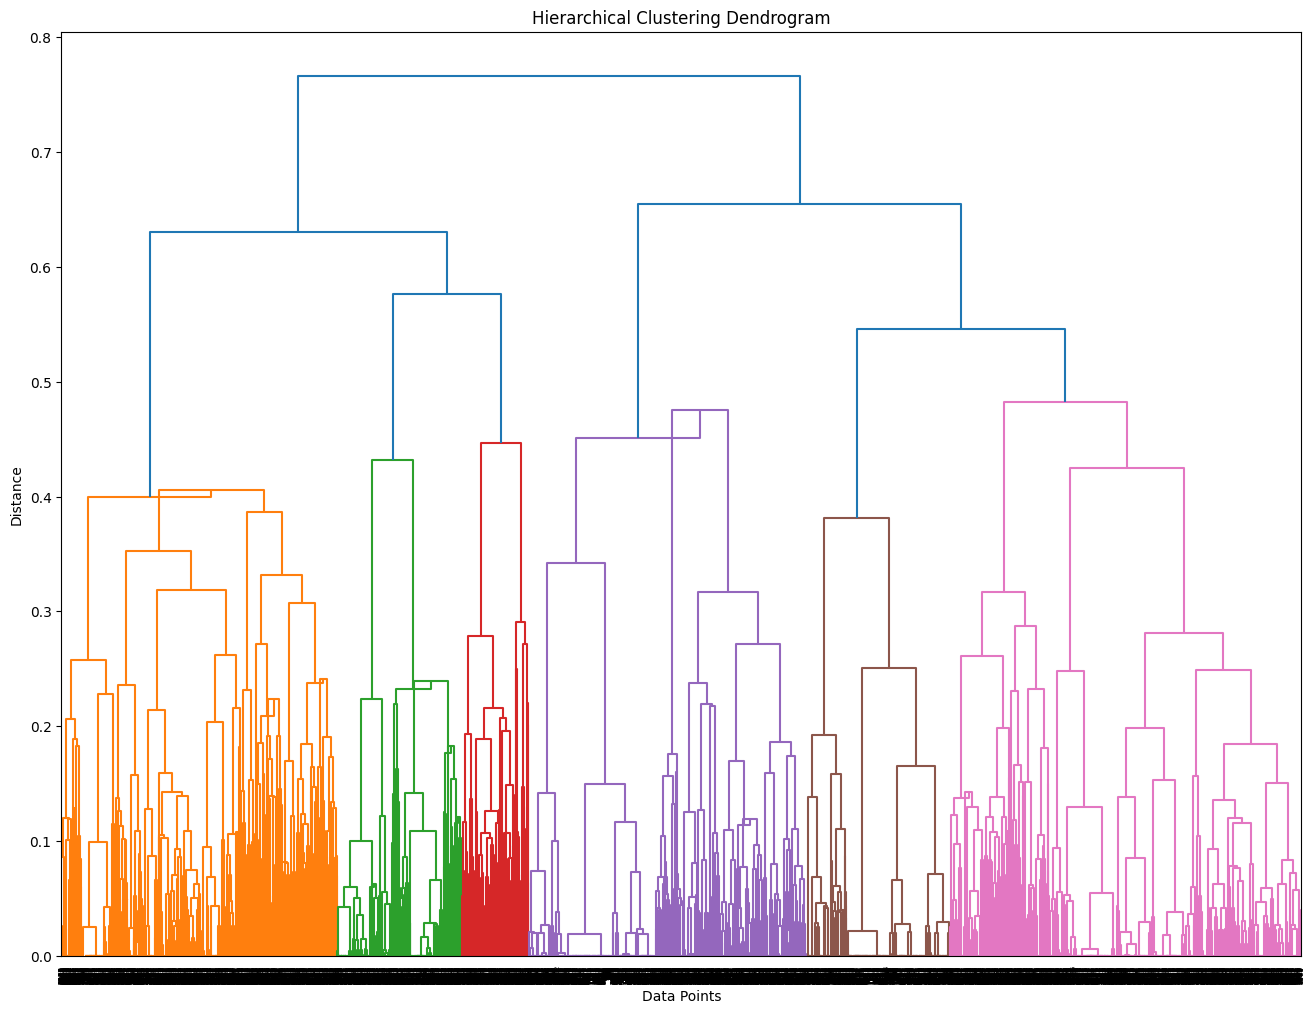

In [5]:
cluster_algo = "centroid"
_plot_clusterMatrix(cluster_algo)

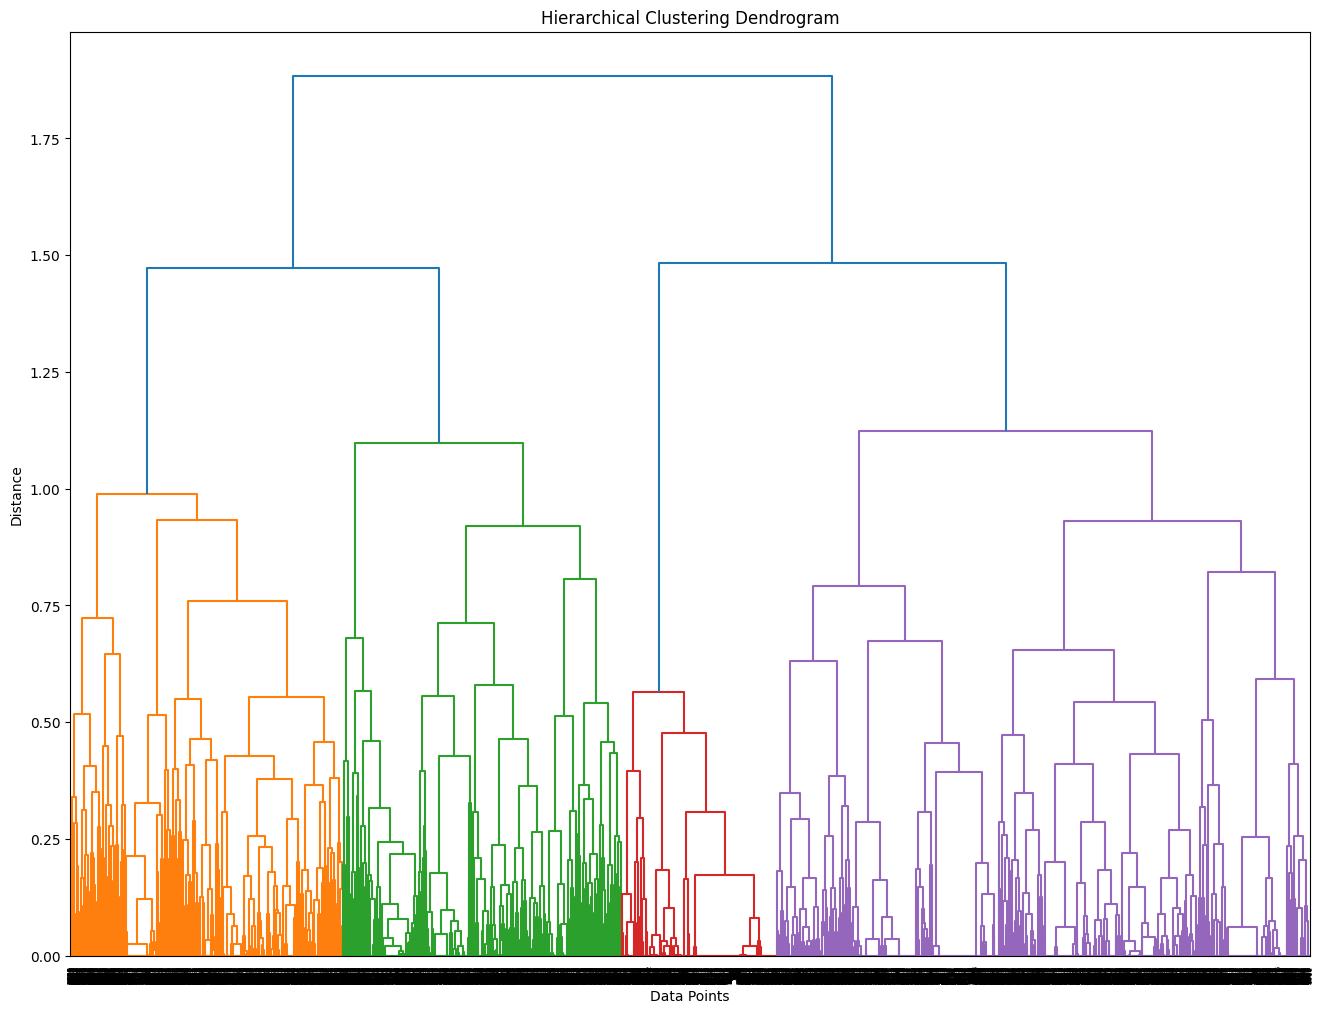

In [6]:
cluster_algo = "complete"
_plot_clusterMatrix(cluster_algo)

In [7]:
label = get_cluster_label("centroid")

1: 1811
2: 823
3: 433
4: 1833
5: 938
6: 2310


In [10]:
df_2021["label_hCluster"] = label
df_2021.to_csv("2021_data_withLabel.csv", index=False)